In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [2]:
import cv2
import pandas as pd
import PIL
import matplotlib.pyplot as plt
import numpy as np
import pytesseract
import os
get_ipython().run_line_magic('matplotlib', 'inline')

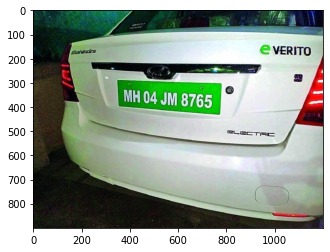

In [3]:
img = cv2.cvtColor(cv2.imread(r"/content/drive/My Drive/Colab Notebooks/electric_vehicles_india_ev_mandate_ev_green_number_plates_electric_car_rules_in_india_ev_rules_1556698450_1200x900.jpg"),cv2.COLOR_RGB2BGR)
plt.imshow(img)
img_ = img.copy()

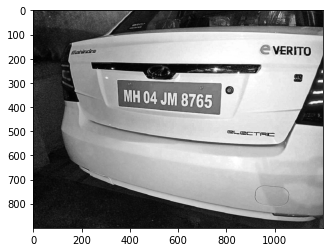

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,"gray")

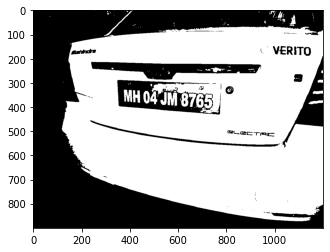

In [5]:
blur = cv2.GaussianBlur(gray,(5,5),0)
_,th = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th,"gray")

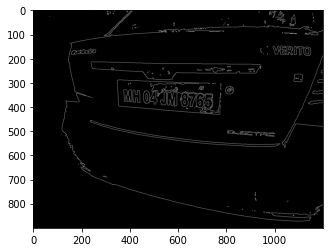

In [6]:
edged = cv2.Canny(th, 0, 255)
plt.imshow(edged,"gray")

In [7]:
ret, thresh = cv2.threshold(blur, 127, 255, 0)
contours_, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

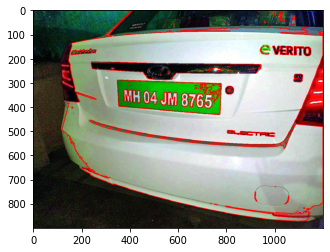

In [8]:
cv2.drawContours(img_, contours_, -1, (255,0,0), 2)
plt.imshow(img_)
contours=sorted(contours_, key = cv2.contourArea, reverse = True)[:30] 

In [9]:
def crop_rect(img, rect):
    # get the parameter of the small rectangle
    center, size, angle = rect[0], rect[1], rect[2]
    center, size = tuple(map(int, center)), tuple(map(int, size))

    # get row and col num in img
    height, width = img.shape[0], img.shape[1]

    # calculate the rotation matrix
    M = cv2.getRotationMatrix2D(center, angle, 1)
    # rotate the original image
    img_rot = cv2.warpAffine(img, M, (width, height))

    # now rotated rectangle becomes vertical and we crop it
    img_crop = cv2.getRectSubPix(img_rot, size, center)
    if img_crop.shape[0]>img_crop.shape[1]:
      img_crop = cv2.rotate(img_crop, cv2.ROTATE_90_COUNTERCLOCKWISE)
    plt.imshow(img_crop)
    plt.show()
    return img_crop

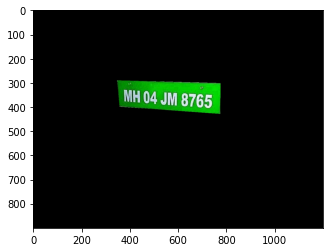

In [10]:
count = 0
for contour in contours:
  polyDP = cv2.approxPolyDP(contour, 0.01 * 
                            cv2.arcLength(contour, True), 
                            True)
  if len(polyDP) == 4:   
    mask = np.zeros(gray.shape,np.uint8)
    num_plat = cv2.drawContours(mask,[polyDP],0,255,-1)
    num_plat = cv2.bitwise_and(img,img,mask=mask)
    min_rect = cv2.minAreaRect(contour)
plt.imshow(num_plat)
plt.show()

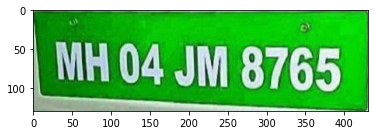

In [11]:
out = crop_rect(img.copy(),min_rect)

In [12]:
text = pytesseract.image_to_string(out, lang='eng')
print("Result : ",text)

Result :  MH 04 JM 8765.



In [13]:
def predict(file_name):
  if os.path.isfile(file_name):
    img = cv2.cvtColor(cv2.imread(file_name),cv2.COLOR_RGB2BGR)
  else:
    print("file not exists")
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  blur = cv2.GaussianBlur(gray,(3,3),0)
  _,th = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  edged = cv2.Canny(th, 0, 255)
  ret, thresh = cv2.threshold(blur, 127, 255, 0)
  contours_, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  contours=sorted(contours_, key = cv2.contourArea, reverse = True)[:30] 
  for contour in contours:
    polyDP = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
    if len(polyDP) < 6:   
      mask = np.zeros(gray.shape,np.uint8)
      num_plat = cv2.drawContours(mask,[polyDP],0,255,-1)
      num_plat = cv2.bitwise_and(img,img,mask=mask)
      min_rect = cv2.minAreaRect(contour)
      out = crop_rect(img.copy(),min_rect)
      result = pytesseract.image_to_string(out, lang='eng')
      print(result)
      if len(result)>8:
        return result
  return "Not found"

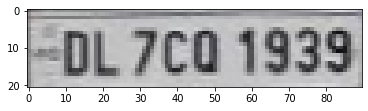

 

-DL7C0 1939



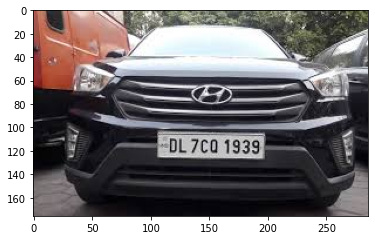

detected  :   

-DL7C0 1939



In [14]:
file_path = r"/content/drive/My Drive/Colab Notebooks/download.jpg"
num_plat = predict(file_path)
img = cv2.cvtColor(cv2.imread(file_path),cv2.COLOR_RGB2BGR)
plt.imshow(img)
plt.show()
print("detected  : ",num_plat)

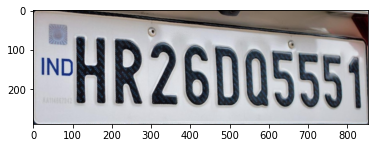

HR26D05554



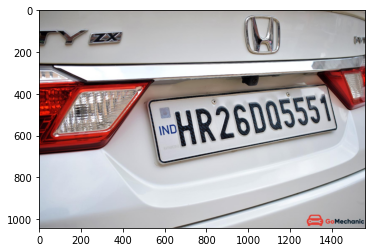

detected  :  HR26D05554



In [15]:
file_path = r"/content/drive/My Drive/Colab Notebooks/car.jpg"
num_plat = predict(file_path)
img = cv2.cvtColor(cv2.imread(file_path),cv2.COLOR_RGB2BGR)
plt.imshow(img)
plt.show()
print("detected  : ",num_plat)

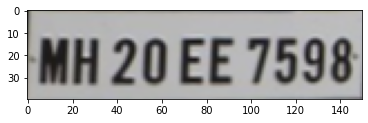

MH 20 EE 7598



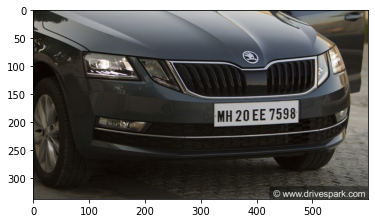

detected  :  MH 20 EE 7598



In [16]:
file_path = r"/content/drive/My Drive/Colab Notebooks/vehicles-will-soon-come-fitted-with-number-plates8-1524479911.jpg"
num_plat = predict(file_path)
img = cv2.cvtColor(cv2.imread(file_path),cv2.COLOR_RGB2BGR)
plt.imshow(img)
plt.show()
print("detected  : ",num_plat)